---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import seaborn
import math
import time

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import PolynomialFeatures


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()
plt.style.use('ggplot')

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# uncomment the following if you want to see a lengthy description of the dataset
# print "keys:", bdata.keys()
# print "feature names:",  bdata.feature_names
# print "data shape:", bdata.data.shape
# print "target shape", bdata.target.shape
print(bdata.DESCR)
# print "-"*80


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
#merge the data and target dataframes
bdata.df=pd.DataFrame(bdata.data)
bdata.target_df=pd.DataFrame(bdata.target)
bdata.target_df
bdata.df=pd.concat([bdata.df,bdata.target_df], axis=1)

#rename dataframe columns
bdata_names=np.append(bdata.feature_names,"Target")
bdata.df.columns=list(bdata_names)

#add RM^2 column
bdata.df["RM2"]=bdata.df.RM**2
bdata.df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,RM2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,43.230625
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,41.229241
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,51.624225
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,48.972004
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,51.079609
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,41.344900
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,36.144144
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,38.093584
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,31.708161
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,36.048016


In [5]:
#call ordinary lease squares regressing median house values on to average number of rooms
lin_model1=smf.ols(formula='Target~RM', data=bdata.df).fit()
lin_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 23 May 2017   Prob (F-statistic):           2.49e-74
Time:                        13:38:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

• Here we can see that there is a strong association between the meadian house values and the avergae number of rooms. From the result of the OLS, we can observe that every unit increase in the number of rooms is associated with an increase in the mediam house values by a factor of 9.1021

In [6]:
#call ordinary lease squares regressing median house values on to average number of rooms and number of rooms squared
lin_model2=smf.ols(formula='Target ~ RM + RM2', data=bdata.df).fit()
lin_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Tue, 23 May 2017   Prob (F-statistic):           1.46e-87
Time:                        13:38:50   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0588     12.104      5.458      0.000      42.278      89.839
RM           -22.6433      3.754     -6.031      0.000     -30.019     -15.267
RM2            2.4701      0.291      8.502      0.000       1.899       3.041
==============================================================================
Omnibus:                       82.173   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.337
Skew:                           0.224   Prob(JB):                    1.29e-203
Kurtosis:                       9.642   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

• Here we can see that as compared the previous results, the result of this OLS varies greatly. This implies that there is a larger weightage of the number of rooms on the median house values than just a direct association.

• From the result of the OLS, we can observe that with an increase in one unit of number of avergage rooms there is a decrease in the median values of the house by a factor of 22.64, but for increase in every unit of the square of the rooms, there is an increase in the median values by a factor of 2.7. This would mean that the effect that the number of rooms have on the average median value is larger than just a simple proportional association.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house.
Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

Note: please use 'random_state=1' and keep 'shuffle=False' when doing the KFold splitting to ensure reproducibility!

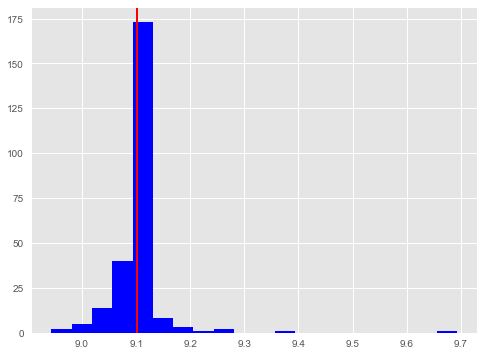

In [7]:
#take features to be used in K-fold cross validation OLS
feat=bdata.df[['RM','Target']]

#initialize the splitting factor
kf=KFold(n_splits=250,random_state=1,shuffle=False)
coef=[]

#loop throgh the K-folds and store the OLS paramters
for train,test in kf.split(feat):
    kf_lin_model=smf.ols(formula='Target~RM', data=feat.iloc[train]).fit()
    coef.append(kf_lin_model.params[1])

#plot a distribution graph of slobe coefficient
plt.figure(figsize=(8,6))
plt.hist(coef,bins=20,color='blue')
plt.axvline(lin_model1.params[1],color='red',linewidth=2)
plt.show()

• Here we notice that the coefficients of all the folds are roughly distributed around the mean slope coefficient.

• One possible explanatoin for such a behavior is that majority of the dataset would conform to the full slope coefficient, with only a few plausible outliers,which has a strong effect on the median prices slope parameter values. 

• This would be the result of the K-fold validation which would have different training data in each fold and as a result it would cover the entire dataset in the process of figuring out the correct paramters

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

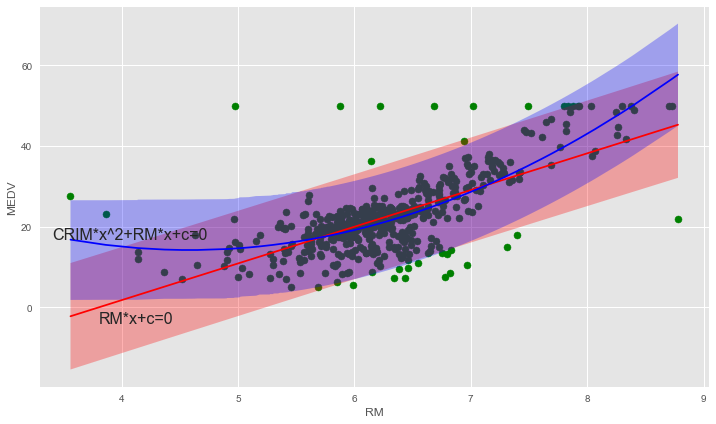

In [8]:
plt.figure(figsize=(12,7))

#create a scatter plot for RM vs Median house values
plt.scatter(bdata.df.RM,bdata.df.Target,color='green')


#plot the 2 regression lines, ie the linear and quadratic line containing RM in linear and RM nad RM^2 in the quadratic equation
plt.plot(np.sort(bdata.df.RM),np.sort(bdata.df.RM)*lin_model1.params[1]+lin_model1.params[0],color='red')
plt.plot(np.sort(bdata.df.RM),lin_model2.params[0]+np.sort(bdata.df.RM)*lin_model2.params[1]+lin_model2.params[2]*(np.sort(bdata.df.RM)**2),color='blue')

#draw 95% confidence bands around both the regression lines
plt.fill_between(np.sort(bdata.df.RM),np.sort(wls_prediction_std(lin_model1))[1],np.sort(wls_prediction_std(lin_model1)[2]),facecolor='r',alpha=0.3)
plt.fill_between(np.sort(bdata.df.RM),np.sort(wls_prediction_std(lin_model2)[1]),np.sort(wls_prediction_std(lin_model2)[2]),facecolor='b',alpha=0.3)

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.text(3.8,-4,"RM*x+c=0", fontsize=16)
plt.text(3.4,17,"CRIM*x^2+RM*x+c=0", fontsize=16)
plt.show()

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: It is always useful to include maximum number of iterations, otherwise a rogue estimation may go on forever.*

In [9]:
# define the ols function
def bivariate_ols(xvalues,yvalues,R,MaxIterations):
    
    #record the start time of the program
    start_time = time.time()
    m=2*xvalues.shape[0]
    
    #intialize the betas for all features to 0
    feats=np.zeros(xvalues.shape[1])
    feats.reshape(xvalues.shape[1],1)
    curr=0
    
    #loop through to converge the loss function
    for x in range(MaxIterations):
        
        #implement the loss function
        y_pred=np.dot(xvalues,feats)
        loss=y_pred-yvalues
        cost=np.sum(loss**2)/(2*m)
        
        #calculate the gradient
        gradient=np.dot(xvalues.T,loss)/m
        
        #calculate the new betas for all features
        feats=feats-R*gradient
        
        #terminate of the gradient has reached the minima
        if np.any(np.abs(gradient)<0.000001):
            return(feats,time.time()-start_time,x,True,gradient)
        
        #terminate of the loss function does not change
        if abs(cost-curr)==0:
            return(feats,time.time()-start_time,x,True)
        curr=cost
    return (feats,time.time()-start_time,x,True,gradient)

In [10]:
#function to calculate rmse
def compute_rmse(predictions,yvalues):
    return np.sqrt(np.sum(np.multiply(yvalues-predictions,yvalues-predictions))/predictions.size)

In [11]:
#initialize the Xvalues using just 
X=np.vstack((np.ones(bdata.df.shape[0]),(np.array(bdata.df.RM)))).T

OLS_model=(bivariate_ols(X,bdata.df.Target,0.005,200000))
print("Coefficients: Intercept:",OLS_model[0][0],"\nRM:",OLS_model[0][1],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

#predict median values based on the coefficients obtained
y_predict=np.dot(X,OLS_model[0].T)
print("RMSE:",compute_rmse(y_predict,bdata.df.Target))

Coefficients: Intercept: -34.5843250339 
RM: 9.08854285296 
Execution Time: 61.6536180973053 
Iterations: 199999
RMSE: 6.6030783369


In [12]:
OLS_model=(bivariate_ols(X,bdata.df.Target,0.01,200000))
print("Coefficients: Intercept:",OLS_model[0][0],"\nRM:",OLS_model[0][1],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

#predict median values based on the coefficients obtained
y_predict=np.dot(X,OLS_model[0].T)
print("RMSE:",compute_rmse(y_predict,bdata.df.Target))

Coefficients: Intercept: -34.669562783 
RM: 9.10194265925 
Execution Time: 63.70819807052612 
Iterations: 173208
RMSE: 6.60307139027


In [13]:
OLS_model=(bivariate_ols(X,bdata.df.Target,0.05,200000))
print("Coefficients: Intercept:",OLS_model[0][0],"\nRM:",OLS_model[0][1],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

#predict median values based on the coefficients obtained
y_predict=np.dot(X,OLS_model[0].T)
print("RMSE:",compute_rmse(y_predict,bdata.df.Target))

Coefficients: Intercept: -34.6695632173 
RM: 9.10194272752 
Execution Time: 11.66026496887207 
Iterations: 34638
RMSE: 6.60307139027


# 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [14]:
def standardize(raw_data):
    """
    standardizes raw data and returns
    standardized data, mean by column, sd by column
    """
    mu = np.mean(raw_data, axis = 0)
    sd = np.std(raw_data, axis = 0)
    return (raw_data - mu) / sd, mu, sd

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with the following values of R: 0.1, 0.01, and 0.001.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [15]:
#normalize and store the input features
X_norm=np.vstack((np.ones(bdata.df.shape[0]),np.array((standardize(bdata.df.CRIM)[0],standardize(bdata.df.RM)[0])))).T

#call multivariate OLS for R 0.1
OLS_model=bivariate_ols(X_norm,bdata.df.Target,0.1,200000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: 22.5328044666 
CRIM: -2.24861509553 
RM: 5.89441071904 
Execution Time: 0.11334586143493652 
Iterations: 317


In [16]:
#call multivariate OLS for R 0.01
OLS_model=bivariate_ols(X_norm,bdata.df.Target,0.01,200000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: 22.5328043407 
CRIM: -2.24861501107 
RM: 5.89441080015 
Execution Time: 1.0191619396209717 
Iterations: 3240


In [17]:
#call multivariate OLS for R 0.001
OLS_model=bivariate_ols(X_norm,bdata.df.Target,0.001,200000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: 21.2205324107 
CRIM: -2.32018492169 
RM: 5.56913386494 
Execution Time: 1.7300570011138916 
Iterations: 5684


• Here we see that the number of iterations and thus the time it takes for OLS by gradient descent to converge increases as we decrease the step size. 

• This tells us that with a smaller step size, it takes greater number of steps to actually reach at the most optimal minima, and thus more number of steps to get the optimal betas for the solution.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [23]:
#take RM and CRIM as input data in it's original form without normalizing them
X=np.vstack((np.ones(bdata.df.shape[0]),np.array((bdata.df.CRIM,bdata.df.RM)))).T

#call multivariate OLS for R 0.05
OLS_model=bivariate_ols(X,bdata.df.Target,0.1,200000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: nan 
CRIM: nan 
RM: nan 
Execution Time: 0.2608358860015869 
Iterations: 531


/Users/jaychauhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
/Users/jaychauhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in subtract
/Users/jaychauhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in less


In [19]:
#call multivariate OLS for R 0.01
OLS_model=bivariate_ols(X,bdata.df.Target,0.01,200000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: -29.2482387591 
CRIM: -0.262001406831 
RM: 8.38922535809 
Execution Time: 37.93647480010986 
Iterations: 112937


In [45]:
#call multivariate OLS for R 0.005
X=np.vstack((np.ones(bdata.df.shape[0]),np.array((bdata.df.CRIM,bdata.df.RM)))).T
OLS_model=bivariate_ols(X,bdata.df.Target,0.001,1000000)
print("Coefficients: Intercept:",OLS_model[0][0],"\nCRIM:",OLS_model[0][1],"\nRM:",OLS_model[0][2],"\nExecution Time:",OLS_model[1],"\nIterations:",OLS_model[2])

Coefficients: Intercept: -29.191348821 
CRIM: -0.262191433333 
RM: 8.38038320745 
Execution Time: 306.04206109046936 
Iterations: 999999


• Here we see that the non standardize results take a lot more time, as a result of taking a lot more iterations as compared to the standardized results to converge to the optimal minima.

• This could be due to the fact that since the scale of the data is varied, which automatically takes more computation time as compared to the normalized data.

•Here we even observe that as the step size becomes smaller, we need to increase the number of iterations drastically in order to reach the optimal minima solution

• We also see that we dont get a reult output for R=0.1 since this can be a problem of too large of a step size to even come close to converging to the optimal minimum solution


## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, first standardize your features before proceeding.

### 3.1 Cross-Validation
Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multiple regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [24]:
#take the input data and stadardize it
X_values=np.vstack((np.ones(bdata.df.shape[0]),np.array((standardize(bdata.df.CRIM)[0],standardize(bdata.df.RM)[0],bdata.df.Target)))).T

#specift the number of splits for K-fold cross validation
kf=KFold(n_splits=15)

#initialize list to store coefficient in each fold
intercept=[]
CRIM_coef=[]
RM_coef=[]

#loop through the ols model and get the coefficients at each loop
for train,test in kf.split(X_values):
    kf_ols_model=bivariate_ols(X_values[train,0:3],X_values[train,3],0.01,200000)
    intercept.append(kf_ols_model[0][0])
    CRIM_coef.append(kf_ols_model[0][1])
    RM_coef.append(kf_ols_model[0][2])
    
#calculate the final coefficients by taking mean of the cross validation coefficients
intercept=(np.mean(intercept))
CRIM=(np.mean(CRIM_coef))
RM=(np.mean(RM_coef))

print("Coefficients:\nIntercept-",intercept,"\nCRIM-",CRIM,"\nRM-",RM)

Coefficients:
Intercept- 22.5270040827 
CRIM- -2.24290631997 
RM- 5.89163861992


### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?  How does it compare to RMSE from a simpler model where number of rooms is the only explanatory variable?

In [25]:
rmse=[]
#calculate rmse for the K-fold cross validation
for train,test in kf.split(X_values):
    predicted=intercept+np.dot(X_values[test,1],CRIM)+np.dot(X_values[test,2],RM)
    rmse.append(compute_rmse(X_values[test,3],predicted))
print("RMSE for the predicted values:",np.mean(rmse))

RMSE for the predicted values: 5.449891755


• Here the RMSE values are pretty impressive giving a value of 5.45 with a step size of 0.01. This RMSE has a better performance as compared to the K-fold cross validation of the K-Nearest neighbors algorithm from the last problemset which gave a value of 5.63 after cross validation. 

• Here the RMSE values are much improved as compared to the RMSE values obtained in a non standardized single variable OLS model, which has RMSE values around 6.6 as can be seen in section 2.1.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [26]:
#create a new variable EXPENSIVE with binary values to indicate median housing price >$40,000
bdata.df['EXPENSIVE']=0
bdata.df.loc[bdata.df.Target>40,'EXPENSIVE']=1
X_logistic=np.vstack((np.ones(bdata.df.shape[0]),np.array((standardize(bdata.df.CHAS)[0],standardize(bdata.df.RM)[0])))).T

In [27]:
def logistic_regression(xvalues,yvalues,R,MaxIterations):
    
    #record the start time of the program
    start_time = time.time()
    
    #intialize the betas for all features to 0
    feats=np.zeros(xvalues.shape[1])
    feats.reshape(xvalues.shape[1],1)
    m=2*xvalues.shape[0]
    curr=0
    
    #loop through to converge the loss function
    for x in range(MaxIterations):
        
         #implement the loss function
        h=1/(1+np.exp(np.dot(xvalues,(-feats.T))))
        cost=np.sum(np.dot(yvalues,np.log(h))+(np.dot((1-yvalues),np.log(1-h))))/(-m)
        
        #calculate the gradient
        gradient=np.dot(xvalues.T,(h-yvalues))/m
        
        #calculate the new betas for all features
        feats=feats-R*gradient
        
        #terminate of the gradient has reached the minima
        if np.any(np.abs(gradient)<0.000001):
            return(feats,time.time()-start_time,x,True,gradient)
        
        #terminate if the loss function does not change
        if abs(cost-curr)==0:
            return(feats,time.time()-start_time,x,True)
        curr=cost
    return (feats,time.time()-start_time,x,True,gradient)

In [28]:
#call the logistic model
logistic_model=logistic_regression(X_logistic,bdata.df.EXPENSIVE,0.01,200000)

#predict the probability for the EXPENSIVE y values using the coefficients retrieved using logistic regression
predicted=1/(1+np.exp(np.dot(X_logistic,(-logistic_model[0].T))))


In [29]:
#classify the probabilities into binary output based on a threshold
y_predicted=np.where(predicted>=0.5, 1, 0)
print("Coefficients: Intercept:",logistic_model[0][0],"\nCHAS:",logistic_model[0][1],"\nRM:",logistic_model[0][2],"\nExecution Time:",logistic_model[1],"\nIterations:",logistic_model[2])
print("Accuracy:",sum(y_predicted==bdata.df.EXPENSIVE)/len(y_predicted))


Coefficients: Intercept: -4.57643205179 
CHAS: 0.33368412682 
RM: 2.16045214003 
Execution Time: 69.3325879573822 
Iterations: 160221
Accuracy: 0.96837944664


• Here the output of the logistic regression using gradient descent was implemented in over a minutes time with a step value of 0.01 and the number of iterations taken were 160221.

•The accuracy was calculated by dividing the totla number of true positives and true negatives with the total number of predictions, which came out to be very close to 97% accurate against the dataset on which the model has been trained.

• We can further increase test for accuracy by splitting the data into train and test sets, or even apply cross validations.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features.  Note: as all the original features are numeric, you can just multiply.  If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [30]:
#data to be used to generate intreaction terms
X=np.array((bdata.df.CRIM,bdata.df.RM,bdata.df.ZN,bdata.df.INDUS,bdata.df.CHAS,\
                                                 bdata.df.NOX,bdata.df.AGE,bdata.df.DIS,bdata.df.RAD,\
                                                 bdata.df.TAX,bdata.df.PTRATIO,bdata.df.B,bdata.df.LSTAT)).T

# create interaction terms of the F_s features
poly = PolynomialFeatures(include_bias=False)
X_interaction=poly.fit_transform(X)

#standardize all the interaction variables
X_inter_norm=standardize(X_interaction)


In [31]:
#add values for intercept and median housing values as the y-values
X_inter_features=np.vstack((np.ones(bdata.df.shape[0]),X_inter_norm[0].T,bdata.df.Target)).T
np.random.seed(seed=5)

#shuffle and split data into test(34%) and train data()
np.random.shuffle(X_inter_features)
X_inter_features_train,X_inter_features_test=X_inter_features[:math.ceil(0.66*X_inter_features.shape[0]),:],X_inter_features[math.ceil(0.66*X_inter_features.shape[0]):,:]

### 4.2 Let's overfit!
Now, using your version of multiple regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [32]:
#run the ols model on 104 features and R=0.01
regul_ols_model=bivariate_ols(X_inter_features_train[:,0:104],X_inter_features_train[:,105],0.01,200000)

#get predictions of the test data using the coefficients obtained against the training model
regul_ols_pred=np.dot(X_inter_features_test[:,0:104],regul_ols_model[0])

##get predictions of the training data data using the coefficients obtained against the training model
regul_ols_pred_train=np.dot(X_inter_features_train[:,0:104],regul_ols_model[0])

#compute rse of the test predictions
print("Testing RMSE:",compute_rmse(X_inter_features_test[:,105],regul_ols_pred))

#compute rmse of the train predictions
print("Training RMSE:",compute_rmse(X_inter_features_train[:,105],regul_ols_pred_train))

Testing RMSE: 5.33597882875
Training RMSE: 4.10098954551


• Here we can see that the the RMSE values of the training set is less as compared to the RMSE values of the test set. This is due to the fact that since we have taken all the interaction variables, we have in effect overfitted the training data to a huge extent and thus the training RMSE is very low.

• The test RMSE also shows a pretty good value, lower as compared to the RMSE value of almost 5.45 from 3.2 and also lower as compared to the RMSE from Nearest neighbor. Thus we can say that the inclusion of interaction variables has explained the variance of the data to a good extent

### 4.3 Ridge regularization
a) Incorporate L2 (Ridge) regularization into your multiple_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

b) Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

c) Go brag to your friends about how you just implemented ridge-regularized multiple regression using gradient descent optimization, from scratch (if you still have any friends left...)

In [33]:
def ridge_regul_ols(xvalues,yvalues,R,MaxIterations,pen_lambda):
    
    #record the start time of the program
    start_time = time.time()
    m=2*xvalues.shape[0]
    
    #intialize the betas for all features to 0
    feats=np.zeros(xvalues.shape[1])
    feats.reshape(xvalues.shape[1],1)
    
    #initialize the wieghts matrix
    w=np.identity(xvalues.shape[1])
    w[0][0]=0
    curr=0
    
    #loop through to converge the loss function
    for x in range(MaxIterations):
        
        #implement the loss function
        y_pred=np.dot(xvalues,feats)
        loss=y_pred-yvalues
        cost=np.sum(loss**2)/(2*m)+pen_lambda*np.dot((np.dot(feats.T,w)),feats.T)
        
        #calculate the gradient
        gradient=(np.dot(xvalues.T,loss)/m)+np.dot((2*pen_lambda*w),feats)
        
        #calculate new betas for all the x variables
        feats=feats-R*gradient
        
        #calculate the gradient
        if np.any(np.abs(gradient)<0.000001):
            return(feats,time.time()-start_time,x,True,gradient)
        
        #terminate if loss function value does not change
        if abs(cost-curr)==0:
            return(feats,time.time()-start_time,x,True)
        curr=cost
    return (feats,time.time()-start_time,x,True,gradient)

In [34]:
#run the ridge model against all the interaction variables with lambda value 1 and step size 0.06
regul_ols_model=ridge_regul_ols(X_inter_features_train[:,0:104],X_inter_features_train[:,105],0.06,200000,1)

#get predicted values based on the coefficents obtained
regul_ols_pred=np.dot(X_inter_features_test[:,0:104],regul_ols_model[0])

#print the RMSE values
print("RMSE:",compute_rmse(X_inter_features_test[:,105],regul_ols_pred))

RMSE: 5.60977596532


In [35]:
#run the ridge model against all the interaction variables with lambda value 0.01 and step size 0.06
regul_ols_model=ridge_regul_ols(X_inter_features_train[:,0:104],X_inter_features_train[:,105],0.06,200000,0.01)

#get predicted values based on the coefficents obtained
regul_ols_pred=np.dot(X_inter_features_test[:,0:104],regul_ols_model[0])

#print the RMSE values
print("RMSE:",compute_rmse(X_inter_features_test[:,105],regul_ols_pred))

RMSE: 6.41215140292


In [36]:
#run the ridge model against all the interaction variables with lambda value 1 and step size 0.1
regul_ols_model=ridge_regul_ols(X_inter_features_train[:,0:104],X_inter_features_train[:,105],0.06,200000,0.1)

#get predicted values based on the coefficents obtained
regul_ols_pred=np.dot(X_inter_features_test[:,0:104],regul_ols_model[0])

#print the RMSE values
print("RMSE:",compute_rmse(X_inter_features_test[:,105],regul_ols_pred))

RMSE: 4.99911032665


In [37]:
#run the ridge model against all the interaction variables with lambda value 1 and step size 0.1
regul_ols_model=ridge_regul_ols(X_inter_features_train[:,0:104],X_inter_features_train[:,105],0.06,200000,0.001)

#get predicted values based on the coefficents obtained
regul_ols_pred=np.dot(X_inter_features_test[:,0:104],regul_ols_model[0])

#print the RMSE values
print("RMSE:",compute_rmse(X_inter_features_test[:,105],regul_ols_pred))

RMSE: 5.71225645614


• Here we have get a number of RMSE values with a different number of lambdas, and there is an RMSE value very close to 5 with lambda value 0.1.

• Thus this would fit the line even better as compared to the models used above in 4.2, 2.3 or even in Nearest neighbors in the previous problem set

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a plot that shows RMSE as a function of lambda.

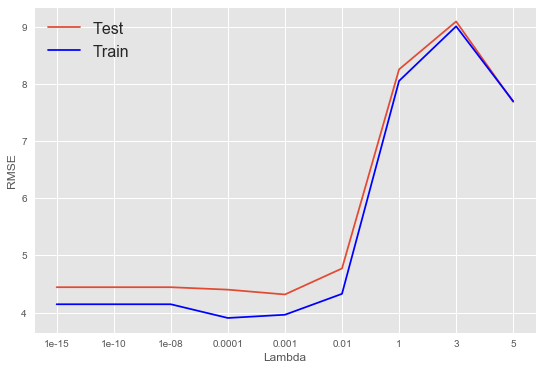

In [38]:
# take  some labda values for running the ridge reglarization
pen_lambda = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 3, 5]

#split dataset into 15 folds
kf=KFold(n_splits=15)

#initilize lists for test and train rmse across different lambdas
test_kmse=[]
train_kmse=[]

#loop through different values of lambda to pass to ridge regularization
for lam in pen_lambda:
    
    #initilize lists for test and train rmse across the k folds
    test_mse=[]
    train_mse=[]
    
    #loop through k folds to get coefficients by ridge regularization
    for train,test in kf.split(X_inter_features):
        
        #call ridgde regularization for different lambdas
        regul_ols_model=ridge_regul_ols(X_inter_features[train,0:104],X_inter_features[train,105],0.06,200000,lam)
        
        #predict median house values using the test and train datasets
        regul_ols_pred_test=np.dot(X_inter_features[test,0:104],regul_ols_model[0])
        regul_ols_pred_train=np.dot(X_inter_features[train,0:104],regul_ols_model[0])
        
        #compute the rmse and store it in the cross validation rmse list
        test_mse.append(compute_rmse(X_inter_features[test,105],regul_ols_pred_test))
        train_mse.append(compute_rmse(X_inter_features[train,105],regul_ols_pred_train))
        
    #append the mean test and train rmse for each lambda to test and train rmse lists across different lambdas
    test_kmse.append(np.mean(test_mse))
    train_kmse.append(np.mean(train_mse))

#plot RMSE vs lambda
plt.figure(figsize=(9,6))
plt.plot(list(range(len(pen_lambda))),test_kmse,label='Test')
plt.plot(list(range(len(pen_lambda))),train_kmse,color='blue',label='Train')
plt.xticks(range(len(pen_lambda)),pen_lambda)
plt.legend(loc='upper left',prop={'size':16})
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.show()

• Here we see that the optimal value of lambda is 0.001, where we see the lowest RMSE values for the test and train dataset. This ridge regression is being carried out for R value 0.06.

• Here the RMSE values of the predictions using ridge regulzarization increases with increasing lambda since lambda is use to penalize the data for complexity and thus with increasing labmda, ridge regulariztion tries to decreases the complexity in turn underfitting the data.

• The RMSE hovers around the previus RMSE's till one point, but as we keep increasing the value of R, the underfitting of the model increases the RMSE of the predictions using ridge above the previous RMSE values.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [39]:
coef=[]

#loop through different values of lambda to retreive original features through ridge regularization
for lam in pen_lambda:
    regul_ols_model=ridge_regul_ols(X_inter_features[train,2:14],X_inter_features[train,105],0.06,200000,lam)
    coef.append(regul_ols_model[0])

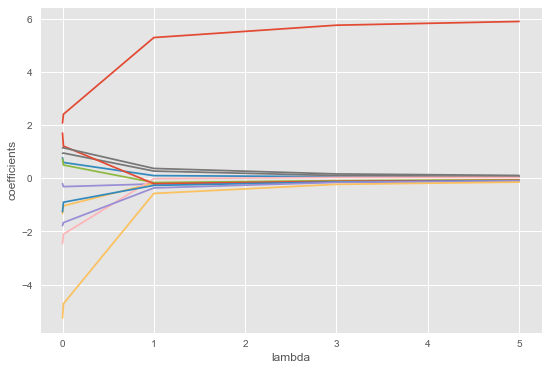

In [40]:
plt.figure(figsize=(9,6))
plt.plot(pen_lambda,coef)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.show()